In [1]:
from lifelines.datasets import load_waltons
df = load_waltons()

df.head()

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137


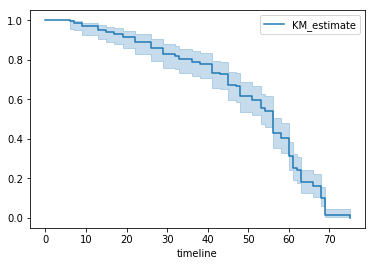

In [3]:
T = df['T'] #survival duration
E = df['E'] #death observed or not
from lifelines import KaplanMeierFitter
%matplotlib inline
kmf = KaplanMeierFitter() # feels like scikit_learn yo~
kmf.fit(T, event_observed=E)
kmf.survival_function_
kmf.cumulative_density_
kmf.median_
kmf.plot_survival_function()

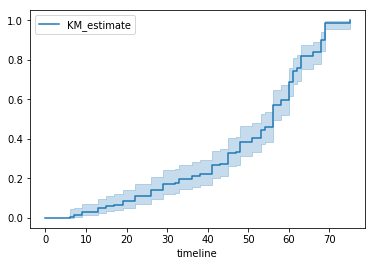

In [4]:
kmf.plot_cumulative_density()

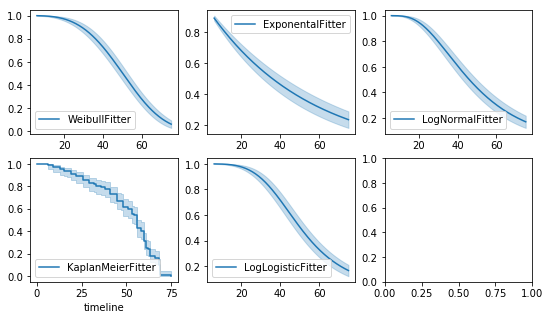

In [16]:
# try many parameteric models
import matplotlib.pyplot as plt
from lifelines import WeibullFitter, ExponentialFitter, LogNormalFitter, LogLogisticFitter, PiecewiseExponentialFitter
fig, axes = plt.subplots(2, 3, figsize=(9, 5))

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')
wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentalFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
#pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter') # this one not working ???

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
#pwf.plot_survival_function(ax=axes[1][2])

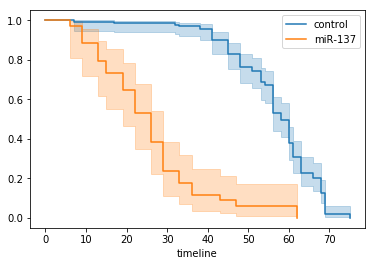

In [18]:
groups = df['group']
ix = (groups == 'miR-137')

kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='miR-137')
ax = kmf.plot(ax=ax)

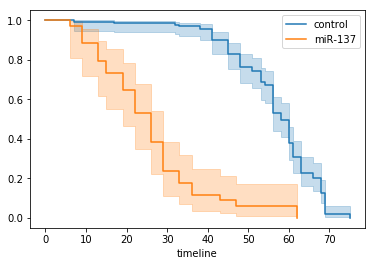

In [19]:
ax = plt.subplot(111)

kmf = KaplanMeierFitter()

for name, grouped_df in df.groupby('group'):
    kmf.fit(grouped_df["T"], grouped_df["E"], label=name)
    kmf.plot(ax=ax)

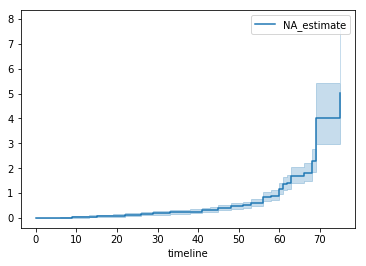

In [21]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(T, event_observed=E)
naf.cumulative_hazard_
naf.plot_cumulative_hazard()

## check my favorite Cox Model

In [23]:
from lifelines.datasets import load_regression_dataset
regression_dataset = load_regression_dataset()

regression_dataset.head()

,var1,var2,var3,T,E
0,0.595170,1.143472,1.571079,14.785652,1
1,0.209325,0.184677,0.356980,7.335846,1
2,0.693919,0.071893,0.557960,5.269797,1
3,0.443804,1.364646,0.374221,11.684092,1
4,1.613324,0.125566,1.921325,7.639492,1


<lifelines.CoxPHFitter: fitted with 200 observations, 11 censored>
      duration col = 'T'
         event col = 'E'
number of subjects = 200
  number of events = 189
    log-likelihood = -807.62
  time fit was run = 2019-03-29 09:11:07 UTC

---
      coef exp(coef)  se(coef)    z      p  -log2(p)  lower 0.95  upper 0.95
var1  0.22      1.25      0.07 2.99 <0.005      8.49        0.08        0.37
var2  0.05      1.05      0.08 0.61   0.54      0.89       -0.11        0.21
var3  0.22      1.24      0.08 2.88 <0.005      7.97        0.07        0.37
---
Concordance = 0.58
Log-likelihood ratio test = 15.54 on 3 df, -log2(p)=9.47


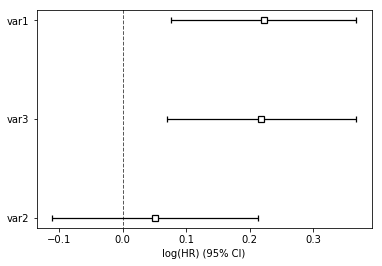

In [26]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(regression_dataset, 'T', event_col='E')
cph.print_summary()
cph.plot()

<lifelines.WeibullAFTFitter: fitted with 200 observations, 11 censored>
      duration col = 'T'
         event col = 'E'
number of subjects = 200
  number of events = 189
    log-likelihood = -501.60
  time fit was run = 2019-03-29 10:25:28 UTC

---
                    coef exp(coef)  se(coef)     z      p  -log2(p)  lower 0.95  upper 0.95
lambda_ var1       -0.11      0.90      0.03 -3.17 <0.005      9.38       -0.17       -0.04
        var2       -0.01      0.99      0.03 -0.27   0.79      0.35       -0.06        0.05
        var3       -0.06      0.95      0.02 -2.70   0.01      7.18       -0.10       -0.02
        _intercept  2.52     12.41      0.05 52.11 <0.005       inf        2.42        2.61
rho_    var1       -0.07      0.94      0.06 -1.08   0.28      1.83       -0.18        0.05
        var2       -0.01      0.99      0.06 -0.18   0.86      0.22       -0.13        0.11
        var3        0.16      1.17      0.06  2.41   0.02      5.96        0.03        0.28
        _inte

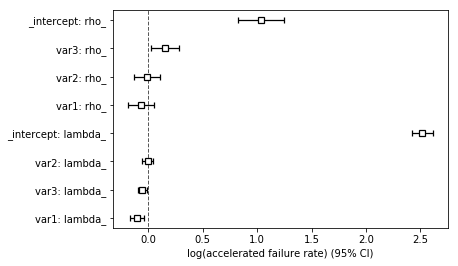

In [28]:
from lifelines import WeibullAFTFitter

wft = WeibullAFTFitter()
wft.fit(regression_dataset, 'T', event_col='E', ancillary_df=regression_dataset)
wft.print_summary()
wft.plot()

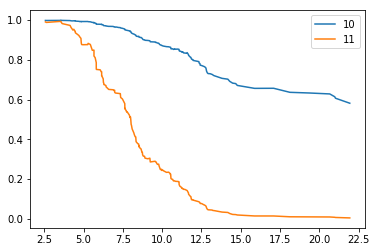

In [33]:
from lifelines import AalenAdditiveFitter
aaf = AalenAdditiveFitter(fit_intercept=False)
aaf.fit(regression_dataset, 'T', event_col='E')
X = regression_dataset.drop(['E', 'T'], axis=1)
aaf.predict_survival_function(X.iloc[10:12]).plot()  # get the unique survival functions of two subjects

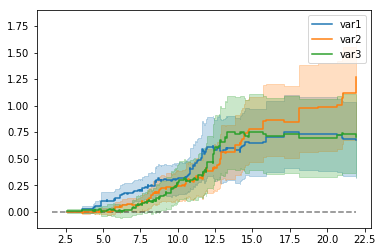

In [34]:
aaf.plot()